In [1]:
!pip install xlrd

In [3]:
import xlrd

workbook = xlrd.open_workbook('C:\\Users\\wfa07\\OneDrive - American University of Beirut\\Fake News\\BotsDataset\\QICC-Bots-DataSet.xlsx',encoding_override='utf-8')
worksheet = workbook.sheet_by_index(1)
train_first_row = [] # The row where we stock the name of the column
for col in range(worksheet.ncols):
    train_first_row.append( worksheet.cell_value(0,col) )
# tronsform the workbook to a list of dictionnary
train_data =[]
for row in range(1, worksheet.nrows):
    elm = {}
    for col in range(worksheet.ncols):
        elm[train_first_row[col]]=worksheet.cell_value(row,col)
    train_data.append(elm)

    
    
test_worksheet = workbook.sheet_by_index(2)
test_first_row = [] # The row where we stock the name of the column
for col in range(test_worksheet.ncols):
    test_first_row.append( test_worksheet.cell_value(0,col) )
# tronsform the workbook to a list of dictionnary
test_data =[]
for row in range(1, test_worksheet.nrows):
    elm = {}
    for col in range(test_worksheet.ncols):
        elm[test_first_row[col]]=test_worksheet.cell_value(row,col)
    test_data.append(elm)


In [4]:
import pandas as pd

train_data_df= pd.DataFrame(train_data)
test_data_df = pd.DataFrame(test_data)

all_data_df = train_data_df.append(test_data_df,ignore_index=True)

In [5]:
print(test_data_df.shape)
print(train_data_df.shape)
print(all_data_df.shape)

(1615, 23)
(18384, 23)
(19999, 23)


In [6]:
train_data.iloc[0]

AttributeError: ignored

In [0]:
!pip install python-twitter

In [0]:
consumer_key='25SjEQNdimGLs9BNcAfbJW3dA'
consumer_secret='RTt7e2m4iWwbXUUHyH4Vn7YRm6jpoQmm4m8RhedqohQBNbyYLU'
access_key = '755246834826838016-GPchEozsoRFTm10LbSbUKyG2NlIoLOR'
access_secret = 'x0LXflU8vJFojsXfgumxLNlh8TEMUCUpqkK5fuH98UY6o'

import twitter
api = twitter.Api(consumer_key=consumer_key,
                      consumer_secret=consumer_secret,
                      access_token_key=access_key,
                      access_token_secret=access_secret)

In [7]:
train_is_default_pic = []

train_users = train_data["Screen Name"].apply(lambda x: x[1:]).tolist()

test_users = test_data["Screen Name"].apply(lambda x: x[1:]).tolist()

TypeError: ignored

In [0]:
for user in train_users:
  try:
    train_is_default_pic.append (api.GetUser(screen_name=user))
  except Exception as e:
    print(user+"  "+str(e))
    train_is_default_pic.append(None)

##Features

In [6]:
!pip install emoji

In [7]:
import emoji

In [8]:
#replace rare app values with other
d = all_data_df['App'].value_counts() >= 2
all_data_df['App'] = [i if d[i] else 'other' for i in all_data_df['App']]

In [9]:
all_data_df["Diff_tweetdate_createddate"] = all_data_df["Date"] = all_data_df["User Since"]

In [10]:
all_data_df["has_link"] = all_data_df["Link(s)"].apply(lambda x: 0 if x=='' else 1)

In [11]:
all_data_df["has_media"] = all_data_df["Media"].apply(lambda x: 0 if x=='' else 1)

In [12]:
all_data_df["is_verified"] = all_data_df["Verfied"].apply(lambda x: 0 if x=='' else 1)

In [13]:
all_data_df["has_location"] = all_data_df["Location_1"].apply(lambda x: 0 if x=='' else 1)

In [14]:
all_data_df["has_bio"] = all_data_df["Bio"].apply(lambda x: 0 if x=='' else 1)

In [15]:
all_data_df["has_website"] = all_data_df["Website"].apply(lambda x: 0 if x=='' else 1)

In [16]:
import re
all_data_df["num_hashtags"] = all_data_df["Tweet Text"].apply(lambda x: len(re.findall(r"#(\w+)", x)))

In [17]:
all_data_df["has_quote"] = all_data_df["Tweet Text"].apply(lambda x: len(re.findall(r"(?<=[ء-ي]\.)(.*)(?=:)", x))>0)

In [18]:
all_data_df["has_:"] = all_data_df["Tweet Text"].apply(lambda x: len(re.findall(r":", x))>0)

In [19]:
def count_emojis(string):
  count=0
  for c in string:
    if c in emoji.UNICODE_EMOJI:
      count=count+1
  return count

all_data_df["num_enojis"] = all_data_df["Tweet Text"].apply(lambda x: count_emojis(x)>0)

In [20]:
all_data_df["FollowerstoFollows_Ratio"] = all_data_df["Follows"] / all_data_df["Followers"] 

In [21]:
import numpy as np
all_data_df["FollowerstoFollows_Ratio"] = all_data_df["FollowerstoFollows_Ratio"].fillna(-1).replace(np.inf,-2)

In [22]:
all_data_features = all_data_df[["Diff_tweetdate_createddate","has_link","has_media","is_verified","has_location","has_bio","has_website","num_hashtags","has_quote","has_:","num_enojis","FollowerstoFollows_Ratio","Retweets","Favorites","Listed",0.181742536,"Followers","Follows"]]

In [23]:
all_data_features.keys()

Index(['Diff_tweetdate_createddate',                   'has_link',
                        'has_media',                'is_verified',
                     'has_location',                    'has_bio',
                      'has_website',               'num_hashtags',
                        'has_quote',                      'has_:',
                       'num_enojis',   'FollowerstoFollows_Ratio',
                         'Retweets',                  'Favorites',
                           'Listed',                  0.181742536,
                        'Followers',                    'Follows'],
      dtype='object')

In [0]:
all_data_features_with_labels = all_data_features.join(all_data_df["Is_Bot ( 1 for Bot / 0 for Human)"])

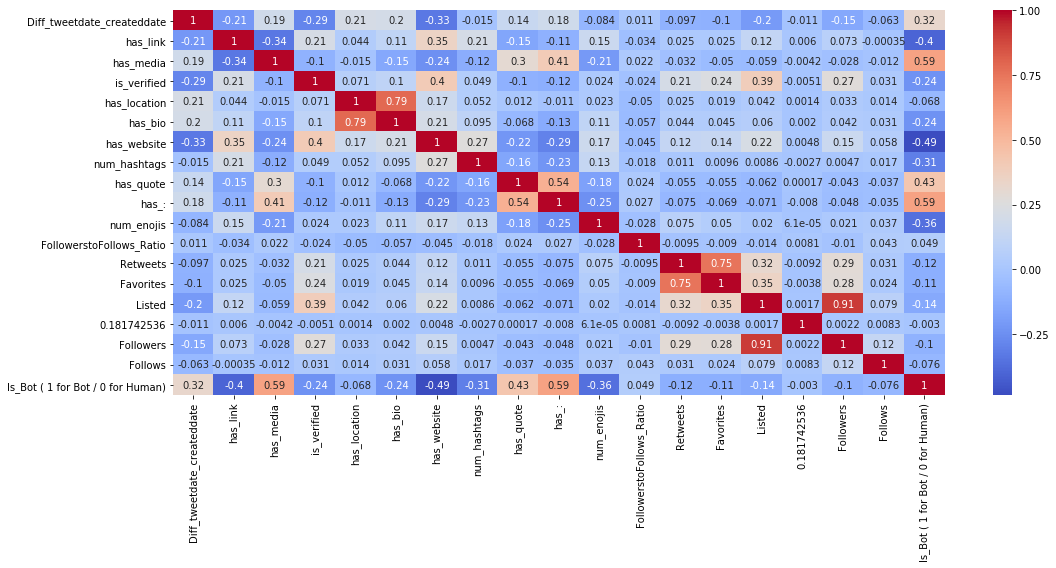

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(all_data_features_with_labels.corr(), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [24]:
all_data_features_after_corr = all_data_features.drop(columns=["has_location","Follows",0.181742536,"FollowerstoFollows_Ratio"])

In [0]:
train_features=all_data_features_after_corr.loc[0:len(train_data_df),]
test_features=all_data_features_after_corr.loc[len(train_data_df):,]

train_label = all_data_df.loc[0:len(train_data_df),"Is_Bot ( 1 for Bot / 0 for Human)"]
test_label = all_data_df.loc[len(train_data_df):,"Is_Bot ( 1 for Bot / 0 for Human)"]

In [0]:
!mkdir data
all_data_df.to_csv("./data/all_data.csv")
all_data_features_after_corr.to_csv("./data/all_data_features_after_corr.csv")
all_data_features.to_csv("./data/all_data_features.csv")
train_features.to_csv("./data/train_features.csv")
test_features.to_csv("./data/test_features.csv")
train_label.to_csv("./data/train_label.csv")
test_label.to_csv("./data/test_label.csv")

mkdir: cannot create directory ‘data’: File exists


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


##Tarining

In [25]:
from sklearn.metrics import precision_score, recall_score , f1_score , classification_report,precision_recall_fscore_support,accuracy_score

def train_model(classifier, feature_vector_train, label, feature_vector_valid,valid_y, epochs=1, show_report=True, print_pred=False):

    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if print_pred:
      print(predictions)
    if show_report:
      print(classification_report(valid_y,predictions))
    return accuracy_score(valid_y, predictions) , precision_recall_fscore_support(valid_y,predictions)

In [26]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
import xgboost


##Logistic Regression

In [0]:
accuracy , prfs = train_model(linear_model.LogisticRegression(), train_features, train_label, test_features,test_label,print_pred=False)
print ("NB, Count Vectors: ", accuracy)

              precision    recall  f1-score   support

         0.0       0.94      0.42      0.58       925
         1.0       0.55      0.97      0.70       690

    accuracy                           0.65      1615
   macro avg       0.75      0.69      0.64      1615
weighted avg       0.78      0.65      0.63      1615

NB, Count Vectors:  0.6538699690402476


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##Random Forest

In [0]:
model=ensemble.RandomForestClassifier(n_estimators=10000,criterion='gini',max_features=None)
accuracy , prfs = train_model(model, train_features, train_label, test_features,test_label,print_pred=False)
print ("NB, Count Vectors: ", accuracy)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       925
         1.0       0.99      0.97      0.98       690

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615

NB, Count Vectors:  0.9801857585139319


In [0]:
import pickle
pickle.dump(model, open("RandomForest.model", 'wb'))

In [0]:
!gsutil cp ./RandomForest.model gs://qatar_competition/

Copying file://./RandomForest.model [Content-Type=application/octet-stream]...
|
Operation completed over 1 objects/136.9 MiB.                                    


In [0]:
loaded_model = pickle.load(open("RandomForest.model", 'rb'))

In [0]:
predictions = loaded_model.predict(test_features)
print(classification_report(test_label,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       925
         1.0       0.99      0.97      0.98       690

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615



In [0]:
Saccuracy , prfs = train_model(svm.SVC(kernel='rbf',decision_function_shape ='ovo',cache_size=1024), train_features, train_label, test_features,test_label,print_pred=False)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       925
         1.0       1.00      0.90      0.95       690

    accuracy                           0.96      1615
   macro avg       0.96      0.95      0.96      1615
weighted avg       0.96      0.96      0.96      1615



##SUper Ensemble search

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

rf1 = RandomForestClassifier(n_estimators=10000, criterion='entropy', n_jobs=-1, random_state=17, max_features=None)
rf2 = RandomForestClassifier(n_estimators=10000, criterion='gini', n_jobs=-1, random_state=17, max_features=None)
adb = AdaBoostClassifier(n_estimators=10000)
gbc = GradientBoostingClassifier(random_state=17)
xgb = XGBClassifier(seed=17)
eclf = VotingClassifier(estimators=[('rf1', rf1), ('rf2', rf2), ('adb', adb), ('gbc', gbc), ('xgb', xgb)], voting='soft',
                        weights=[1, 1, 1, 1, 1])
eclf.fit(train_features, train_label)




ensemble performance:


NameError: ignored

In [0]:
y_val_pred = eclf.predict_proba(test_features)
print('\nensemble performance:')
print('f1 score: ', f1_score(test_label, np.argmax(y_val_pred, axis=1), average="macro"))
print('precision score:', precision_score(test_label, np.argmax(y_val_pred, axis=1), average="macro"))
print('recall score:', recall_score(test_label, np.argmax(y_val_pred, axis=1), average="macro"))
print('accuracy score:', accuracy_score(test_label, np.argmax(y_val_pred, axis=1)))
print(classification_report(test_label, np.argmax(y_val_pred, axis=1), target_names=['human', 'bot']))


ensemble performance:
f1 score:  0.980333696687584
precision score: 0.9818400315208826
recall score: 0.979009009009009
accuracy score: 0.9808049535603716
              precision    recall  f1-score   support

       human       0.98      0.99      0.98       925
         bot       0.99      0.97      0.98       690

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615



In [0]:
import pickle
pickle.dump(eclf, open("VotingClassifier.model", 'wb'))

In [0]:
loaded_model = pickle.load(open("VotingClassifier.model", 'rb'))

In [0]:
y_val_pred2 = loaded_model.predict(test_features)

In [0]:
print('\n Random Forest Only performance:')
print('f1 score: ', f1_score(test_label, y_val_pred2, average="macro"))
print('precision score:', precision_score(test_label, y_val_pred2, average="macro"))
print('recall score:', recall_score(test_label, y_val_pred2, average="macro"))
print('accuracy score:', accuracy_score(test_label, y_val_pred2))
print(classification_report(test_label, y_val_pred2, target_names=['human', 'bot']))


 Random Forest Only performance:
f1 score:  0.9797032782661699
precision score: 0.9810961239137695
recall score: 0.9784684684684685
accuracy score: 0.9801857585139319
              precision    recall  f1-score   support

       human       0.98      0.99      0.98       925
         bot       0.99      0.97      0.98       690

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615



In [0]:
y_val_pred2

array([0., 1., 1., ..., 1., 1., 0.])

In [0]:
!gsutil cp ./VotingClassifier.model gs://qatar_competition/

Copying file://./VotingClassifier.model [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

/
Operation completed over 1 objects/264.9 MiB.                                    


## Hyper Feature Search


In [35]:
from itertools import combinations
from tqdm import tqdm_notebook as tqdm
count=0
best_features=[]
best_f1_score=0
train_label = all_data_df.loc[0:len(train_data_df),"Is_Bot ( 1 for Bot / 0 for Human)"]
test_label = all_data_df.loc[len(train_data_df):,"Is_Bot ( 1 for Bot / 0 for Human)"]

for j in tqdm(range(0,len(all_data_features_after_corr.keys()))):
    for i in tqdm(list(combinations(all_data_features_after_corr.keys(),j))):
        #print(i)
        selected_datafeatures= all_data_features_after_corr.drop(columns=list(i))

        train_features=selected_datafeatures.loc[0:len(train_data_df),]
        test_features=selected_datafeatures.loc[len(train_data_df):,]

        model_gini=ensemble.RandomForestClassifier(n_estimators=1000,criterion='gini',max_features=None,n_jobs=8)
        model_entropy=ensemble.RandomForestClassifier(n_estimators=1000,criterion='entropy',max_features=None,n_jobs=8)

        model_gini.fit(train_features, train_label)
        model_entropy.fit(train_features, train_label)

        predictions_gini = model_gini.predict(test_features)
        predictions_entropy = model_entropy.predict(test_features)

        f1_gini = f1_score(test_label,predictions_gini)
        f1_entropy = f1_score(test_label,predictions_entropy)
        #raise TypeError
        if f1_gini>best_f1_score:
            best_f1_score=f1_gini
            best_features=i
            best_model=model_gini
            print(selected_datafeatures.keys())
            print(classification_report(test_label,predictions_gini))

        if f1_entropy>best_f1_score:
            best_f1_score=f1_entropy
            best_features=i
            best_model=model_entropy
            print(selected_datafeatures.keys())
            print(classification_report(test_label,predictions_entropy))
    
    



Index(['Diff_tweetdate_createddate', 'has_link', 'has_media', 'is_verified',
       'has_bio', 'has_website', 'num_hashtags', 'has_quote', 'has_:',
       'num_enojis', 'Retweets', 'Favorites', 'Listed', 'Followers'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       925
         1.0       0.99      0.97      0.98       690

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615

Index(['Diff_tweetdate_createddate', 'has_link', 'has_media', 'is_verified',
       'has_bio', 'has_website', 'num_hashtags', 'has_quote', 'has_:',
       'num_enojis', 'Retweets', 'Favorites', 'Listed', 'Followers'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       925
         1.0       0.99      0.97      0.98       690

    accuracy                 

Index(['Diff_tweetdate_createddate', 'has_link', 'has_media', 'is_verified',
       'has_website', 'num_hashtags', 'has_quote', 'has_:', 'num_enojis',
       'Retweets', 'Favorites', 'Listed', 'Followers'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       925
         1.0       0.99      0.97      0.98       690

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615

Index(['Diff_tweetdate_createddate', 'has_link', 'has_media', 'is_verified',
       'has_bio', 'num_hashtags', 'has_quote', 'has_:', 'num_enojis',
       'Retweets', 'Favorites', 'Listed', 'Followers'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       925
         1.0       0.99      0.97      0.98       690

    accuracy                           0.98      1615
 

Index(['Diff_tweetdate_createddate', 'has_link', 'is_verified', 'has_bio',
       'has_website', 'num_hashtags', 'has_quote', 'has_:', 'num_enojis',
       'Retweets', 'Favorites', 'Listed'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.97      0.98       690

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615



Index(['Diff_tweetdate_createddate', 'has_link', 'is_verified', 'has_bio',
       'has_website', 'num_hashtags', 'has_quote', 'num_enojis', 'Retweets',
       'Favorites', 'Listed'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.98      0.98       690

    accuracy                           0.98      1615
   macro avg       0.99      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615



Index(['Diff_tweetdate_createddate', 'is_verified', 'has_bio', 'num_hashtags',
       'has_quote', 'has_:', 'num_enojis', 'Retweets', 'Favorites', 'Listed'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.98      0.98       690

    accuracy                           0.99      1615
   macro avg       0.99      0.98      0.98      1615
weighted avg       0.99      0.99      0.99      1615

Index(['Diff_tweetdate_createddate', 'has_link', 'is_verified', 'has_bio',
       'num_hashtags', 'has_quote', 'has_:', 'num_enojis', 'Retweets',
       'Listed'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.98      0.98       690

    accuracy                           0.99      1615
   macro avg       0.99      0.98      0.98      1615
weighted avg       0.99      0.99  

Index(['Diff_tweetdate_createddate', 'has_link', 'is_verified', 'has_bio',
       'num_hashtags', 'has_quote', 'num_enojis', 'Favorites', 'Listed'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.98      0.98       690

    accuracy                           0.99      1615
   macro avg       0.99      0.98      0.99      1615
weighted avg       0.99      0.99      0.99      1615

Index(['Diff_tweetdate_createddate', 'has_link', 'is_verified', 'has_bio',
       'num_hashtags', 'has_quote', 'has_:', 'num_enojis', 'Listed'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.98      0.98       690

    accuracy                           0.99      1615
   macro avg       0.99      0.98      0.99      1615
weighted avg       0.99      0.99      0.99      1615



Index(['Diff_tweetdate_createddate', 'has_link', 'is_verified', 'has_bio',
       'num_hashtags', 'num_enojis', 'Favorites', 'Listed'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.98      0.98       690

    accuracy                           0.99      1615
   macro avg       0.99      0.99      0.99      1615
weighted avg       0.99      0.99      0.99      1615



Index(['Diff_tweetdate_createddate', 'has_link', 'is_verified', 'has_quote',
       'has_:', 'Favorites'],
      dtype='object')
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       925
         1.0       0.99      0.98      0.98       690

    accuracy                           0.99      1615
   macro avg       0.99      0.99      0.99      1615
weighted avg       0.99      0.99      0.99      1615



In [29]:
%pdb

Automatic pdb calling has been turned ON


In [27]:
f1_score(1,1)

TypeError: Expected sequence or array-like, got <class 'int'>